In [1]:
import numpy as np
import pandas as pd
from scratch import *

Linear Regression
Training loss after  0  iterations is  1.5811388300841898
Training loss after  500  iterations is  0.11515089871796896
Training loss after  1000  iterations is  0.11515089872154656
Training loss after  1500  iterations is  0.11515089872154524
Training loss after  2000  iterations is  0.11515089872154423
Training loss after  2500  iterations is  0.11515089872154423
Training loss after  3000  iterations is  0.11515089872154423
Training loss after  3500  iterations is  0.11515089872154423
Training loss after  4000  iterations is  0.11515089872154423
Training loss after  4500  iterations is  0.11515089872154423
Predicted Values: [[2.76462962]
 [2.76462962]]
True Values: [3]


In [2]:
""" Running Linear Regression on Alabone dataset """

' Running Linear Regression on Alabone dataset '

In [3]:
dataset = pd.read_csv("LR_dataset/abalone/Dataset.data",sep="\s+", 
                 skiprows=1,  usecols=[0,1,2,3,4,5,6,7,8], 
                 names=['sex','length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings' ])

In [4]:
dataset.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [5]:
dataset = dataset.sample(frac = 1)
dataset.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
1629,I,0.570,0.445,0.155,0.8670,0.3705,0.1705,0.2800,9
2663,F,0.570,0.430,0.160,0.8110,0.3875,0.1590,0.2285,9
157,F,0.580,0.455,0.170,0.9075,0.3740,0.2135,0.2850,13
986,M,0.570,0.445,0.140,1.0635,0.5265,0.2195,0.2400,8
3950,F,0.465,0.390,0.110,0.6355,0.1815,0.1570,0.2250,13


In [6]:
train_columns = ['sex','length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']
test_columns = ['rings']
X = np.array(dataset[train_columns])
Y = np.array(dataset[test_columns])

print(X)
print(Y)
print(X.shape)
print(Y.shape)

[['I' 0.57 0.445 ... 0.3705 0.1705 0.28]
 ['F' 0.57 0.43 ... 0.3875 0.159 0.2285]
 ['F' 0.58 0.455 ... 0.374 0.2135 0.285]
 ...
 ['M' 0.45 0.335 ... 0.2165 0.126 0.11]
 ['M' 0.645 0.51 ... 0.6445 0.29600000000000004 0.425]
 ['F' 0.55 0.47 ... 0.377 0.184 0.29]]
[[ 9]
 [ 9]
 [13]
 ...
 [ 6]
 [12]
 [ 9]]
(4176, 8)
(4176, 1)


In [3]:
def preprocess_dataset(X):
    """
    Preprocess the dataset, converts the 'sex' column numerical and normalise the dataset

    Parameters
    ----------
    X : 2-dimensional numpy array of shape (n_samples, n_features) which is data.
        
    Returns
    -------
    X : Preprocessed X
    """
    m = X.shape[0]
    for i in range(m):
        if(X[i,0] == 'M'):
            X[i,0] = 1  #if M then 1
        elif(X[i,0] == 'F'):
            X[i,0] = 2  #if F then 2
        elif(X[i,0] == 'I'):
            X[i,0] = 3
    X = X.T
#     print(X.shape)
    for i in range(X.shape[0]):
        mean = X[i, :].mean()
        std =  X[i, :].std()
        X[i,:] = (X[i,:] - mean)/std
    
    return X.T
    

In [8]:
X = preprocess_dataset(X)
print(X.shape)
print(X)
print(Y)

(4176, 8)
[[1.261716441199176 0.38298011321836534 0.37393547813892836 ...
  0.05001152846130522 -0.09226269596205387 0.2956112538125435]
 [0.05352385728544997 0.38298011321836534 0.22278316406398477 ...
  0.12660427411759767 -0.19718268769508032 -0.07437095972521818]
 [0.05352385728544997 0.46625226529583436 0.4747036875222241 ...
  0.06578062315524778 0.3000468383440445 0.3315318570686365]
 ...
 [-1.154668726628276 -0.6162857117112608 -0.7345148250773236 ...
  -0.643828638072167 -0.49825744658115595 -0.9256892568946307]
 [-1.154668726628276 1.0075212537993825 1.02892883913035 ...
  1.2845063702156647 1.0527337355592339 1.3373087482392505]
 [0.05352385728544997 0.21643580906342835 0.6258560015971671 ...
  0.07929699003576998 0.030904250854976906 0.3674524603247299]]
[[ 9]
 [ 9]
 [13]
 ...
 [ 6]
 [12]
 [ 9]]


In [4]:
def k_fold_cross_validation(X, y, k=5, loss = "rmse", epochs = 5000, learning_rate = 0.01):
    """ Performs K fold cross validation
    Parameters
    ----------
    model : instance of the model to be used
    X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as data.
    y : 1-dimensional numpy array of shape (n_samples,) which acts as labels.
    k : number of folds, default = 5
    
    Returns
    -------
    model : instance of model
    """
    m = X.shape[0]  #number of examples
    fold_size = int(m/k)
    start = 0
    end = fold_size
    models = {}
    for i in range(k):
        Xtrain_i = np.concatenate((X[0:start], X[end+1:]))
        ytrain_i = np.concatenate((y[0:start],y[end+1:]))
        X_test =  X[start:end]
        y_test = y[start:end]
        model = MyLinearRegression()
        model.fit(Xtrain_i,ytrain_i,X_test,y_test,epochs,learning_rate, loss)
        if(loss == "rmse"):
            models[i] = (model.rmse_train_history[-1], model.rmse_val_history[-1], model.rmse_train_history, model.rmse_val_history )
        if(loss == "mae"):
            models[i] = (model.mae_train_history[-1], model.mae_val_history[-1], model.mae_train_history, model.mae_val_history )
#         y_pred = model.predict(X_test)
#         rmse_val = np.sum(((y_test - y_pred)**2)**0.5)/len(y_pred)
#         mae_val = np.sum(np.abs(y_test - y_pred)/len(y_pred))
#         rmse_train_history.append(model.get_rmse_loss())
#         mae_train_history.append(model.get_mae_loss())
#         rmse_val_history.append(rmse_val)
#         mae_val_history.append(mae_val)
#         print(Xtrain_i.shape,ytrain_i.shape,X_test.shape,y_test.shape)
        print(model.W)
        print(model.b)
        start+=fold_size
        end+=fold_size
        
    
    return models
    

In [10]:
models_mae = k_fold_cross_validation(X,Y, learning_rate = 0.01, loss = "mae")


Training loss after  0  iterations is :  9.910479041916167  | validation loss is :  10.025149700598803
Training loss after  500  iterations is :  4.972509234775378  | validation loss is :  5.075473694424922
Training loss after  1000  iterations is :  1.8267072707349694  | validation loss is :  1.9076349755229378
Training loss after  1500  iterations is :  1.6738647751954916  | validation loss is :  1.7442929625974657
Training loss after  2000  iterations is :  1.6279077952034444  | validation loss is :  1.695464313749591
Training loss after  2500  iterations is :  1.6028808623530475  | validation loss is :  1.669453263014544
Training loss after  3000  iterations is :  1.5863540987711877  | validation loss is :  1.6541547097426752
Training loss after  3500  iterations is :  1.5747029167211473  | validation loss is :  1.6426923957289354
Training loss after  4000  iterations is :  1.567155880891698  | validation loss is :  1.6347923028090139
Training loss after  4500  iterations is :  1.5

In [11]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


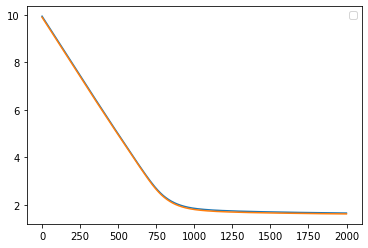

In [12]:
plt.plot([x for x in range(2000)], models_mae[3][2][0:2000])
plt.plot([x for x in range(2000)], models_mae[3][3][0:2000])

plt.legend()
plt.show()

In [13]:
models = k_fold_cross_validation(X,Y)

Training loss after  0  iterations is :  10.42284168269455  | validation loss is :  10.524280452454514
Training loss after  500  iterations is :  5.836902417921157  | validation loss is :  5.865552619469556
Training loss after  1000  iterations is :  2.888654379577995  | validation loss is :  2.890786760372226
Training loss after  1500  iterations is :  2.3938041672538444  | validation loss is :  2.3792378536367647
Training loss after  2000  iterations is :  2.324767771501614  | validation loss is :  2.3129544049148385
Training loss after  2500  iterations is :  2.28793675836094  | validation loss is :  2.2815524942923786
Training loss after  3000  iterations is :  2.2653553748884514  | validation loss is :  2.263790844034308
Training loss after  3500  iterations is :  2.2512912296235195  | validation loss is :  2.2534988504388083
Training loss after  4000  iterations is :  2.242375767169937  | validation loss is :  2.2474089028629827
Training loss after  4500  iterations is :  2.23657

No handles with labels found to put in legend.


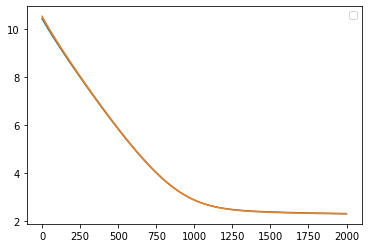

In [14]:
plt.plot([x for x in range(2000)], models[0][2][0:2000])
plt.plot([x for x in range(2000)], models[0][3][0:2000])

plt.legend()
plt.show()

In [15]:
print(models_mae)

{0: (1.5588493936719905, 1.6254943177994512, [9.910479041916167, 9.900474463045079, 9.890469884174145, 9.880465305303302, 9.870460726432697, 9.86045614756216, 9.850451568691792, 9.840446989821604, 9.830442410951512, 9.820437832081577, 9.810433253211805, 9.800428674342172, 9.79042409547268, 9.780419516603363, 9.770414937734166, 9.760410358865139, 9.750405779996251, 9.740401201127519, 9.73039662225892, 9.72039204339051, 9.710387464522231, 9.700382885654115, 9.690378306786169, 9.680373727918312, 9.670369149050662, 9.660364570183166, 9.650359991315783, 9.640355412448582, 9.630350833581572, 9.62034625471466, 9.610341675847954, 9.60033709698137, 9.590332518114966, 9.580327939248685, 9.570323360382618, 9.560318781516681, 9.55031420265088, 9.540309623785278, 9.530305044919832, 9.520300466054545, 9.510295887189425, 9.500291308324437, 9.490286729459662, 9.480282150595016, 9.47027757173057, 9.460272992866205, 9.450268414002087, 9.440263835138119, 9.430259256274326, 9.420254677410679, 9.4102500985

In [16]:
print(models)

{0: (2.232661543575005, 2.2412838872837146, [10.42284168269455, 10.411885332050396, 10.400946713635696, 10.390025679070375, 10.379122081067193, 10.368235773428287, 10.3573666110413, 10.34651444987562, 10.335679146978467, 10.324860560471167, 10.31405854954496, 10.303272974457284, 10.292503696527511, 10.28175057813302, 10.27101348270508, 10.260292274724584, 10.249586819717914, 10.238896984252772, 10.228222635933768, 10.21756364339817, 10.206919876311721, 10.196291205363972, 10.185677502264015, 10.175078639736148, 10.164494491515196, 10.153924932342132, 10.14336983795952, 10.13282908510696, 10.12230255151648, 10.11179011590795, 10.101291657984449, 10.090807058427567, 10.080336198892763, 10.069878962004674, 10.05943523135228, 10.049004891484357, 10.038587827904538, 10.028183927066552, 10.017793076369587, 10.007415164153313, 9.997050079693054, 9.986697713195019, 9.976357955791457, 9.96603069953568, 9.955715837397317, 9.945413263257317, 9.9351228719031, 9.92484455902361, 9.91457822120443, 9.

In [17]:
print("Stats for LR MAE Loss")
for i in range(len(models_mae)):
    print("For CV number ",i, "the train loss = ", models_mae[i][0], " and the val loss = ", models_mae[i][1] )
print("Stats for LR RMSE Loss")
for i in range(len(models)):
    print("For CV number ",i, "the train loss = ", models[i][0], " and the val loss = ", models[i][1] )

Stats for LR MAE Loss
For CV number  0 the train loss =  1.5588493936719905  and the val loss =  1.6254943177994512
For CV number  1 the train loss =  1.5571060764294153  and the val loss =  1.6496357656863696
For CV number  2 the train loss =  1.570288764227005  and the val loss =  1.577823898913462
For CV number  3 the train loss =  1.5720731601046043  and the val loss =  1.5600300048034272
For CV number  4 the train loss =  1.5937175287223617  and the val loss =  1.4686857137920022
Stats for LR RMSE Loss
For CV number  0 the train loss =  2.232661543575005  and the val loss =  2.2412838872837146
For CV number  1 the train loss =  2.2030135316625663  and the val loss =  2.451773438117386
For CV number  2 the train loss =  2.2223992207221057  and the val loss =  2.2971983918556527
For CV number  3 the train loss =  2.237603595935281  and the val loss =  2.2108995312815263
For CV number  4 the train loss =  2.2647775802125403  and the val loss =  2.100687589942627


In [18]:
""" In both the cases we notice that FOLD 0 intern gives us the best validation loss, so we choose that as the best fold"""

' In both the cases we notice that FOLD 0 intern gives us the best validation loss, so we choose that as the best fold'

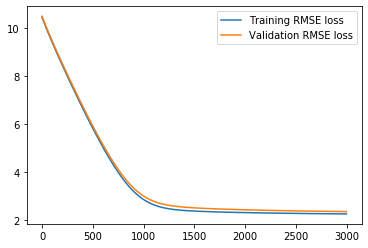

In [19]:
plt.plot([x for x in range(3000)], models[2][2][0:3000], label = "Training RMSE loss " )
plt.plot([x for x in range(3000)], models[2][3][0:3000], label = "Validation RMSE loss")

plt.legend()
plt.show()

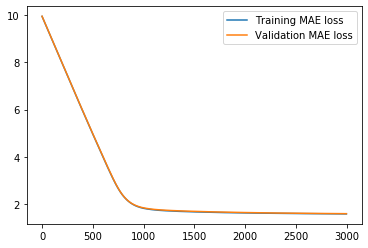

In [20]:
plt.plot([x for x in range(3000)], models_mae[2][2][0:3000], label = "Training MAE loss " )
plt.plot([x for x in range(3000)], models_mae[2][3][0:3000], label = "Validation MAE loss")

plt.legend()
plt.show()

In [5]:
dataset = pd.read_csv("LR_dataset/VideoGameDataset - Video_Games_Sales_as_at_22_Dec_2016.csv",  usecols=['Critic_Score','Global_Sales','User_Score'])

In [6]:
dataset.head()

,Global_Sales,Critic_Score,User_Score
0,82.53,76.0,8
1,40.24,NaN,NaN
2,35.52,82.0,8.3
3,32.77,80.0,8
4,31.37,NaN,NaN


In [7]:
dataset.isna().sum()

Global_Sales       0
Critic_Score    8582
User_Score      6704
dtype: int64

In [8]:
mean_critic_score = dataset["Critic_Score"].mean()
print("mean_critic_score", mean_critic_score)
dataset['User_Score'].value_counts()

mean_critic_score 68.96767850559173


tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.7       2
0.5       2
0.3       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

In [9]:
dataset["Critic_Score"] = dataset["Critic_Score"].fillna(mean_critic_score)
dataset.head()
# dataset['User_Score'].replace(to_replace = 'tbd', value = np.nan,inplace=True)
dataset = dataset.drop(dataset[dataset.User_Score == "tbd"].index)
dataset["User_Score"] = pd.to_numeric(dataset["User_Score"], downcast="float")
mean_user_score = dataset["User_Score"].mean()
dataset["User_Score"] = dataset["User_Score"].fillna(mean_user_score)
print("mean_user_score", mean_user_score)
dataset['User_Score'].value_counts()


mean_user_score 7.125075817108154


7.125076    6704
7.800000     324
8.000000     290
8.200000     282
8.300000     254
            ... 
1.500000       2
0.500000       2
1.000000       2
9.700000       1
0.000000       1
Name: User_Score, Length: 96, dtype: int64

In [10]:
dataset.head()

,Global_Sales,Critic_Score,User_Score
0,82.53,76.000000,8.000000
1,40.24,68.967679,7.125076
2,35.52,82.000000,8.300000
3,32.77,80.000000,8.000000
4,31.37,68.967679,7.125076


In [11]:
train_columns = ["Global_Sales", "Critic_Score"]
X = np.array(dataset[train_columns])
Y = np.array(dataset["User_Score"])
Y = Y.reshape((Y.shape[0],1))
X = (X - X.mean())/X.std()
print(X)
print(Y)
print(X.shape)
print(Y.shape)

[[ 1.34744957  1.16196728]
 [ 0.14621745  0.96221674]
 [ 0.01214756  1.33239511]
 ...
 [-0.99650112  0.96221674]
 [-0.99650112  0.96221674]
 [-0.99650112  0.96221674]]
[[8.      ]
 [7.125076]
 [8.3     ]
 ...
 [7.125076]
 [7.125076]
 [7.125076]]
(14294, 2)
(14294, 1)


In [15]:
video_game_model_rmse = k_fold_cross_validation(X,Y, epochs = 10000, learning_rate = 0.001)

Training loss after  0  iterations is :  7.150232399294235  | validation loss is :  7.436115243353019
Training loss after  500  iterations is :  5.734067273798055  | validation loss is :  5.957510987099877
Training loss after  1000  iterations is :  4.336896623195397  | validation loss is :  4.499529549928502
Training loss after  1500  iterations is :  2.9843774770869778  | validation loss is :  3.090106847390267
Training loss after  2000  iterations is :  1.7698793479337898  | validation loss is :  1.8309426242450149
Training loss after  2500  iterations is :  1.0403001806193757  | validation loss is :  1.0935227061122155
Training loss after  3000  iterations is :  0.9173132772714516  | validation loss is :  0.9819545844536713
Training loss after  3500  iterations is :  0.9109530390265487  | validation loss is :  0.9789531360268409
Training loss after  4000  iterations is :  0.9106718876691938  | validation loss is :  0.9793333961898143
Training loss after  4500  iterations is :  0.91

Training loss after  8000  iterations is :  0.9210368796786951  | validation loss is :  0.9416002899095056
Training loss after  8500  iterations is :  0.9209467172983965  | validation loss is :  0.9415745922772082
Training loss after  9000  iterations is :  0.920861164516446  | validation loss is :  0.9415522829117569
Training loss after  9500  iterations is :  0.9207799710809379  | validation loss is :  0.9415331242138203
[[-2.3805662 ]
 [ 2.35708122]]
2.4707437384513993
Training loss after  0  iterations is :  7.230901886022158  | validation loss is :  7.117698656566672
Training loss after  500  iterations is :  5.784487558512698  | validation loss is :  5.681615456517836
Training loss after  1000  iterations is :  4.359600013092306  | validation loss is :  4.263431693626921
Training loss after  1500  iterations is :  2.9857505921108745  | validation loss is :  2.8880990268890563
Training loss after  2000  iterations is :  1.770071989465613  | validation loss is :  1.649355652565659


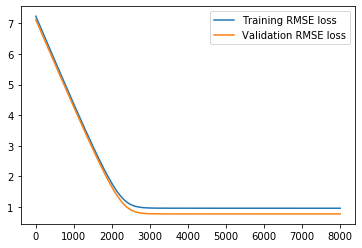

In [17]:
plt.plot([x for x in range(8000)], video_game_model_rmse[4][2][0:8000], label = "Training RMSE loss " )
plt.plot([x for x in range(8000)], video_game_model_rmse[4][3][0:8000], label = "Validation RMSE loss")

plt.legend()
plt.show()

In [27]:
video_game_model_mae = k_fold_cross_validation(X,Y, learning_rate = 0.001,loss = "mae")

Training loss after  0  iterations is :  7.067419418740804  | validation loss is :  7.355202010997615
Training loss after  500  iterations is :  5.636336922447158  | validation loss is :  5.861347959034672
Training loss after  1000  iterations is :  4.219595140891781  | validation loss is :  4.378368503944544
Training loss after  1500  iterations is :  2.8540466237272493  | validation loss is :  2.9495827975415505
Training loss after  2000  iterations is :  1.6125053111258358  | validation loss is :  1.66769949094615
Training loss after  2500  iterations is :  0.6800887934300462  | validation loss is :  0.7797459714041317
Training loss after  3000  iterations is :  0.4760529241323296  | validation loss is :  0.6230918629066348
Training loss after  3500  iterations is :  0.47604800471781783  | validation loss is :  0.6230751100853852
Training loss after  4000  iterations is :  0.47604295839090055  | validation loss is :  0.6230283834903753
Training loss after  4500  iterations is :  0.4

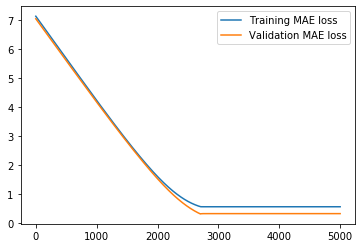

In [28]:
plt.plot([x for x in range(5000)], video_game_model_mae[4][2][0:5000], label = "Training MAE loss " )
plt.plot([x for x in range(5000)], video_game_model_mae[4][3][0:5000], label = "Validation MAE loss")

plt.legend()
plt.show()